In [291]:
import sys
sys.path.append('../')
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from src.finance_ml.data_preparation.data_preparation import DataLoader
from src.finance_ml.data_preparation.asset_class import Asset
import warnings
warnings.filterwarnings('ignore')

In [292]:
dataloader = DataLoader(time_index_col= 'DATE', keep_cols = ['VOLUME','OPEN', "HIGHT",'CLOSE', 'LOW', 'TRANSACTIONS'])
assets = {'ETHUSD':'../data/cryptos/ETHUSD_2020-04-07_2022-04-06.parquet'}
gold_asset = dataloader.load_dataset(assets)
gold_asset

,ETHUSD_VOLUME,ETHUSD_OPEN,ETHUSD_HIGHT,ETHUSD_CLOSE,ETHUSD_LOW,ETHUSD_TRANSACTIONS
DATE,,,,,,
2020-04-07 17:58:00,6509.138870,172.270,172.290000,172.220000,171.953,34
2020-04-07 17:59:00,2030.296178,172.280,172.400000,172.310000,171.928,39
2020-04-07 18:00:00,1379.195752,171.974,172.440000,172.224027,171.974,64
2020-04-07 18:01:00,1070.755580,172.041,172.270000,172.260000,171.930,66
2020-04-07 18:02:00,323.613345,172.250,172.250000,171.980000,171.840,31
...,...,...,...,...,...,...
2022-04-06 23:54:00,256.869062,3166.900,3168.300000,3164.100000,3163.340,661
2022-04-06 23:55:00,1315.909782,3164.100,3176.485925,3169.950000,3162.730,1020
2022-04-06 23:56:00,272.323250,3170.050,3174.442301,3162.330000,3162.200,775


In [293]:
gold_asset.index

DatetimeIndex(['2020-04-07 17:58:00', '2020-04-07 17:59:00',
               '2020-04-07 18:00:00', '2020-04-07 18:01:00',
               '2020-04-07 18:02:00', '2020-04-07 18:03:00',
               '2020-04-07 18:04:00', '2020-04-07 18:05:00',
               '2020-04-07 18:06:00', '2020-04-07 18:07:00',
               ...
               '2022-04-06 23:49:00', '2022-04-06 23:50:00',
               '2022-04-06 23:51:00', '2022-04-06 23:52:00',
               '2022-04-06 23:53:00', '2022-04-06 23:54:00',
               '2022-04-06 23:55:00', '2022-04-06 23:56:00',
               '2022-04-06 23:57:00', '2022-04-06 23:58:00'],
              dtype='datetime64[ns]', name='DATE', length=1047230, freq=None)

In [294]:
gold_asset_df = gold_asset.reset_index()
gold_asset_df

,DATE,ETHUSD_VOLUME,ETHUSD_OPEN,ETHUSD_HIGHT,ETHUSD_CLOSE,ETHUSD_LOW,ETHUSD_TRANSACTIONS
0,2020-04-07 17:58:00,6509.138870,172.270,172.290000,172.220000,171.953,34
1,2020-04-07 17:59:00,2030.296178,172.280,172.400000,172.310000,171.928,39
2,2020-04-07 18:00:00,1379.195752,171.974,172.440000,172.224027,171.974,64
3,2020-04-07 18:01:00,1070.755580,172.041,172.270000,172.260000,171.930,66
4,2020-04-07 18:02:00,323.613345,172.250,172.250000,171.980000,171.840,31
...,...,...,...,...,...,...,...
1047225,2022-04-06 23:54:00,256.869062,3166.900,3168.300000,3164.100000,3163.340,661
1047226,2022-04-06 23:55:00,1315.909782,3164.100,3176.485925,3169.950000,3162.730,1020
1047227,2022-04-06 23:56:00,272.323250,3170.050,3174.442301,3162.330000,3162.200,775
1047228,2022-04-06 23:57:00,305.533719,3163.120,3169.800000,3168.840000,3161.640,613


In [295]:
gold_asset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047230 entries, 0 to 1047229
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   DATE                 1047230 non-null  datetime64[ns]
 1   ETHUSD_VOLUME        1047230 non-null  float64       
 2   ETHUSD_OPEN          1047230 non-null  float64       
 3   ETHUSD_HIGHT         1047230 non-null  float64       
 4   ETHUSD_CLOSE         1047230 non-null  float64       
 5   ETHUSD_LOW           1047230 non-null  float64       
 6   ETHUSD_TRANSACTIONS  1047230 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.9 MB


In [296]:
summary_stats = gold_asset_df.describe()

In [297]:
correlation_matrix = gold_asset_df.corr()

In [298]:
print("Summary Statistics:")
print(summary_stats)
print("\nCorrelation Matrix:")
print(correlation_matrix)

Summary Statistics:
       ETHUSD_VOLUME   ETHUSD_OPEN  ETHUSD_HIGHT  ETHUSD_CLOSE    ETHUSD_LOW  \
count   1.047230e+06  1.047230e+06  1.047230e+06  1.047230e+06  1.047230e+06   
mean    4.195454e+02  1.903268e+03  1.905380e+03  1.903275e+03  1.900886e+03   
std     7.916565e+02  1.400886e+03  1.402051e+03  1.400889e+03  1.399585e+03   
min     5.000000e-04  1.486900e+02  1.496000e+02  1.488600e+02  1.470000e+02   
25%     7.235071e+01  3.919150e+02  3.923200e+02  3.918900e+02  3.914282e+02   
50%     1.700089e+02  1.915640e+03  1.918300e+03  1.915750e+03  1.912980e+03   
75%     4.400195e+02  3.109210e+03  3.111700e+03  3.109180e+03  3.106450e+03   
max     6.134199e+04  4.864970e+03  4.868790e+03  4.864890e+03  4.859400e+03   

       ETHUSD_TRANSACTIONS  
count         1.047230e+06  
mean          2.582546e+02  
std           2.995234e+02  
min           1.000000e+00  
25%           7.400000e+01  
50%           1.840000e+02  
75%           3.330000e+02  
max           1.063500e+04 

In [299]:
gold_asset_df['DATE']

# Group by date and keep the last entry for each date
df_merged = gold_asset_df.groupby(gold_asset_df['DATE'].dt.date).last()
df_merged


,DATE,ETHUSD_VOLUME,ETHUSD_OPEN,ETHUSD_HIGHT,ETHUSD_CLOSE,ETHUSD_LOW,ETHUSD_TRANSACTIONS
DATE,,,,,,,
2020-04-07,2020-04-07 23:59:00,6050.274097,164.787,164.898021,164.64500,164.560000,47
2020-04-08,2020-04-08 23:59:00,835.208537,173.300,173.780000,173.78000,173.096000,69
2020-04-09,2020-04-09 23:59:00,1405.588180,169.825,170.070000,170.00000,169.697000,60
2020-04-10,2020-04-10 23:59:00,588.018139,158.180,158.200000,158.16999,157.828000,30
2020-04-11,2020-04-11 23:59:00,5.016882,158.650,158.790000,158.58000,158.410000,23
...,...,...,...,...,...,...,...
2022-04-02,2022-04-02 23:59:00,24.062936,3444.550,3445.950000,3445.37000,3442.555228,276
2022-04-03,2022-04-03 23:59:00,47.206842,3521.020,3523.190000,3522.79000,3518.637406,269
2022-04-04,2022-04-04 23:59:00,50.290972,3521.460,3523.000000,3520.40000,3519.200000,339


In [300]:
total_days = df_merged['DATE'].dt.date.nunique()
total_years = total_days / 365.25  # Accounting for leap years

# Display the result
print("Total Days:", total_days)
print("Total Years:", total_years)

Total Days: 728
Total Years: 1.9931553730321698


In [301]:
df=df_merged[df_merged['ETHUSD_VOLUME']!=0]
df.reset_index(drop=True, inplace=True)
df

,DATE,ETHUSD_VOLUME,ETHUSD_OPEN,ETHUSD_HIGHT,ETHUSD_CLOSE,ETHUSD_LOW,ETHUSD_TRANSACTIONS
0,2020-04-07 23:59:00,6050.274097,164.787,164.898021,164.64500,164.560000,47
1,2020-04-08 23:59:00,835.208537,173.300,173.780000,173.78000,173.096000,69
2,2020-04-09 23:59:00,1405.588180,169.825,170.070000,170.00000,169.697000,60
3,2020-04-10 23:59:00,588.018139,158.180,158.200000,158.16999,157.828000,30
4,2020-04-11 23:59:00,5.016882,158.650,158.790000,158.58000,158.410000,23
...,...,...,...,...,...,...,...
723,2022-04-02 23:59:00,24.062936,3444.550,3445.950000,3445.37000,3442.555228,276
724,2022-04-03 23:59:00,47.206842,3521.020,3523.190000,3522.79000,3518.637406,269
725,2022-04-04 23:59:00,50.290972,3521.460,3523.000000,3520.40000,3519.200000,339
726,2022-04-05 23:58:00,412.878174,3409.680,3413.480000,3409.23000,3406.100000,762


In [302]:
df = df.rename(columns={
    'DATE': 'Date',
    'ETHUSD_VOLUME': 'volume',
    'ETHUSD_OPEN': 'open',
    'ETHUSD_HIGHT': 'high',
    'ETHUSD_CLOSE': 'close',
    'ETHUSD_LOW': 'low',
    'ETHUSD_TRANSACTIONS': 'transactions'
})

In [303]:
df

,Date,volume,open,high,close,low,transactions
0,2020-04-07 23:59:00,6050.274097,164.787,164.898021,164.64500,164.560000,47
1,2020-04-08 23:59:00,835.208537,173.300,173.780000,173.78000,173.096000,69
2,2020-04-09 23:59:00,1405.588180,169.825,170.070000,170.00000,169.697000,60
3,2020-04-10 23:59:00,588.018139,158.180,158.200000,158.16999,157.828000,30
4,2020-04-11 23:59:00,5.016882,158.650,158.790000,158.58000,158.410000,23
...,...,...,...,...,...,...,...
723,2022-04-02 23:59:00,24.062936,3444.550,3445.950000,3445.37000,3442.555228,276
724,2022-04-03 23:59:00,47.206842,3521.020,3523.190000,3522.79000,3518.637406,269
725,2022-04-04 23:59:00,50.290972,3521.460,3523.000000,3520.40000,3519.200000,339
726,2022-04-05 23:58:00,412.878174,3409.680,3413.480000,3409.23000,3406.100000,762


In [304]:
def support(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.low[i]>df1.low[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.low[i]<df1.low[i-1]):
            return 0
    return 1

def resistance(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.high[i]<df1.high[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.high[i]>df1.high[i-1]):
            return 0
    return 1

In [305]:
length = len(df)
high = list(df['high'])
low = list(df['low'])
close = list(df['close'])
open = list(df['open'])
bodydiff = [0] * length

highdiff = [0] * length
lowdiff = [0] * length
ratio1 = [0] * length
ratio2 = [0] * length

def isEngulfing(l):
    row=l
    bodydiff[row] = abs(open[row]-close[row])
    if bodydiff[row]<0.000001:
        bodydiff[row]=0.000001      

    bodydiffmin = 0.002
    if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        open[row-1]<close[row-1] and
        open[row]>close[row] and 
        (open[row]-close[row-1])>=-0e-5 and close[row]<open[row-1]): #+0e-5 -5e-5
        return 1

    elif(bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        open[row-1]>close[row-1] and
        open[row]<close[row] and 
        (open[row]-close[row-1])<=+0e-5 and close[row]>open[row-1]):#-0e-5 +5e-5
        return 2
    else:
        return 0
       
def isStar(l):
    bodydiffmin = 0.0020
    row=l
    highdiff[row] = high[row]-max(open[row],close[row])
    lowdiff[row] = min(open[row],close[row])-low[row]
    bodydiff[row] = abs(open[row]-close[row])
    if bodydiff[row]<0.000001:
        bodydiff[row]=0.000001
    ratio1[row] = highdiff[row]/bodydiff[row]
    ratio2[row] = lowdiff[row]/bodydiff[row]

    if (ratio1[row]>1 and lowdiff[row]<0.2*highdiff[row] and bodydiff[row]>bodydiffmin):# and open[row]>close[row]):
        return 1
    elif (ratio2[row]>1 and highdiff[row]<0.2*lowdiff[row] and bodydiff[row]>bodydiffmin):# and open[row]<close[row]):
        return 2
    else:
        return 0
    
def closeResistance(l,levels,lim):
    if len(levels)==0:
        return 0
    c1 = abs(df.high[l]-min(levels, key=lambda x:abs(x-df.high[l])))<=lim
    c2 = abs(max(df.open[l],df.close[l])-min(levels, key=lambda x:abs(x-df.high[l])))<=lim
    c3 = min(df.open[l],df.close[l])<min(levels, key=lambda x:abs(x-df.high[l]))
    c4 = df.low[l]<min(levels, key=lambda x:abs(x-df.high[l]))
    if( (c1 or c2) and c3 and c4 ):
        return 1
    else:
        return 0
    
def closeSupport(l,levels,lim):
    if len(levels)==0:
        return 0
    c1 = abs(df.low[l]-min(levels, key=lambda x:abs(x-df.low[l])))<=lim
    c2 = abs(min(df.open[l],df.close[l])-min(levels, key=lambda x:abs(x-df.low[l])))<=lim
    c3 = max(df.open[l],df.close[l])>min(levels, key=lambda x:abs(x-df.low[l]))
    c4 = df.high[l]>min(levels, key=lambda x:abs(x-df.low[l]))
    if( (c1 or c2) and c3 and c4 ):
        return 1
    else:
        return 0

In [306]:
n1=1
n2=1
backCandles=20
signal = [0] * length

for row in range(backCandles, len(df)-n2):
    ss = []
    rr = []
    for subrow in range(row-backCandles+n1, row+1):
        if support(df, subrow, n1, n2):
            ss.append(df.low[subrow])
        if resistance(df, subrow, n1, n2):
            rr.append(df.high[subrow])
    #!!!! parameters
    if ((isEngulfing(row)==1 or isStar(row)==1) and closeResistance(row, rr, 150e-5) ):#and df.RSI[row]<30
        signal[row] = 1
    elif((isEngulfing(row)==2 or isStar(row)==2) and closeSupport(row, ss, 150e-5)):#and df.RSI[row]>70
        signal[row] = 2
    else:
        signal[row] = 0



In [307]:
import matplotlib.pyplot as plt

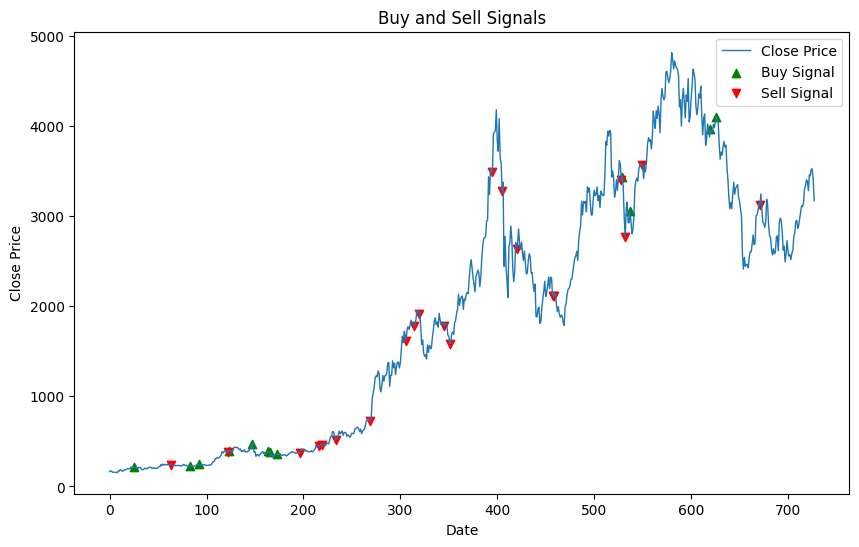

In [309]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'], label='Close Price', linewidth=1)

# Plotting buying signals (Green)
buy_signals = [index for index, value in enumerate(signal) if value == 1]
plt.scatter(df.index[buy_signals], df['close'].iloc[buy_signals], marker='^', color='g', label='Buy Signal')

# Plotting selling signals (Red)
sell_signals = [index for index, value in enumerate(signal) if value == 2]
plt.scatter(df.index[sell_signals], df['close'].iloc[sell_signals], marker='v', color='r', label='Sell Signal')

plt.title('Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

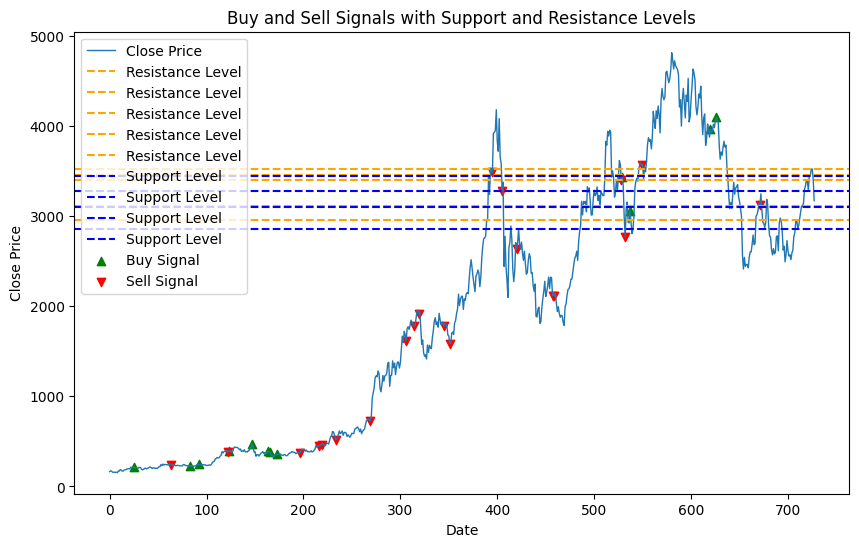

In [310]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'], label='Close Price', linewidth=1)

# Plotting support and resistance levels
for level in rr:
    plt.axhline(level, color='orange', linestyle='--', label='Resistance Level')

for level in ss:
    plt.axhline(level, color='blue', linestyle='--', label='Support Level')

# Plotting buying signals (Green)
buy_signals = [index for index, value in enumerate(signal) if value == 1]
plt.scatter(df.index[buy_signals], df['close'].iloc[buy_signals], marker='^', color='g', label='Buy Signal')

# Plotting selling signals (Red)
sell_signals = [index for index, value in enumerate(signal) if value == 2]
plt.scatter(df.index[sell_signals], df['close'].iloc[sell_signals], marker='v', color='r', label='Sell Signal')

plt.title('Buy and Sell Signals with Support and Resistance Levels')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

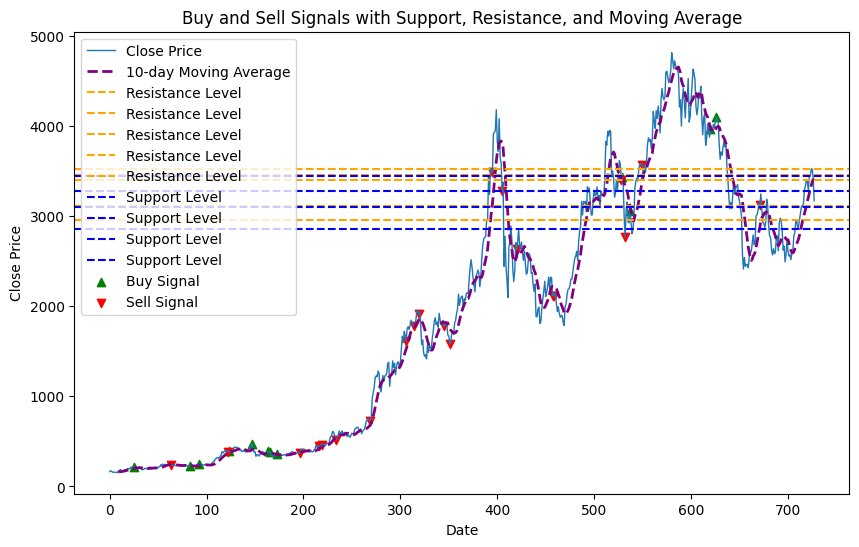

In [311]:
window_size = 10  # Adjust the window size as needed
df['MA'] = df['close'].rolling(window=window_size).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'], label='Close Price', linewidth=1)
plt.plot(df.index, df['MA'], label=f'{window_size}-day Moving Average', linestyle='--', color='purple', linewidth=2)

# Plotting support and resistance levels
for level in rr:
    plt.axhline(level, color='orange', linestyle='--', label='Resistance Level')

for level in ss:
    plt.axhline(level, color='blue', linestyle='--', label='Support Level')

# Plotting buying signals (Green)
buy_signals = [index for index, value in enumerate(signal) if value == 1]
plt.scatter(df.index[buy_signals], df['close'].iloc[buy_signals], marker='^', color='g', label='Buy Signal')

# Plotting selling signals (Red)
sell_signals = [index for index, value in enumerate(signal) if value == 2]
plt.scatter(df.index[sell_signals], df['close'].iloc[sell_signals], marker='v', color='r', label='Sell Signal')

plt.title('Buy and Sell Signals with Support, Resistance, and Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [283]:
df['signal']=signal

In [284]:
df[df['signal']==2].count()

Date            21
volume          21
open            21
high            21
close           21
low             21
transactions    21
signal          21
dtype: int64

In [285]:
df.columns = ['Local time', 'Volume', 'Open', 'High', 'Close','Low', "transactions" , 'signal']
df=df.iloc[100:200]
df

,Local time,Volume,Open,High,Close,Low,transactions,signal
100,2020-07-16 23:59:00,82.061734,233.510,233.993976,233.410000,233.410,28,0
101,2020-07-17 23:59:00,58.107203,232.660,233.180000,233.180000,232.660,12,0
102,2020-07-18 23:59:00,20.200740,236.200,236.200000,236.190246,235.770,9,0
103,2020-07-19 23:59:00,246.724028,239.080,239.580000,239.240000,238.734,32,0
104,2020-07-20 23:59:00,49.249500,236.062,236.476619,236.080000,235.980,39,0
...,...,...,...,...,...,...,...,...
195,2020-10-19 23:59:00,31.580503,379.310,379.730000,379.630000,379.064,42,0
196,2020-10-20 23:59:00,67.182875,368.740,368.850000,368.810000,367.859,39,2
197,2020-10-21 23:59:00,112.297487,391.770,392.090000,390.198000,390.198,94,0
198,2020-10-22 23:59:00,101.088021,414.540,414.860000,414.310000,413.645,70,0


In [286]:
def SIGNAL():
    return df.signal

In [287]:
from backtesting import Strategy

class MyCandlesStrat(Strategy):  
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next() 
        if self.signal1==2:
            sl1 = self.data.Close[-1] - 730e-1
            tp1 = self.data.Close[-1] + 600e-1
            self.buy(sl=sl1, tp=tp1)
        elif self.signal1==1:
            sl1 = self.data.Close[-1] + 730e-1
            tp1 = self.data.Close[-1] - 600e-1
            self.sell(sl=sl1, tp=tp1)

In [288]:
from backtesting import Backtest

bt = Backtest(df, MyCandlesStrat, cash=10_000, commission=.002)
stat = bt.run()
stat

Start                                   100.0
End                                     199.0
Duration                                 99.0
Exposure Time [%]                        59.0
Equity Final [$]                 13381.368993
Equity Peak [$]                  16422.648993
Return [%]                           33.81369
Buy & Hold Return [%]               75.450923
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -19.700354
Avg. Drawdown [%]                   -5.272707
Max. Drawdown Duration                   18.0
Avg. Drawdown Duration                  6.875
# Trades                                  5.0
Win Rate [%]                             80.0
Best Trade [%]                      19.865742
Worst Trade [%]                    -16.006621
Avg. Trade [%]                    

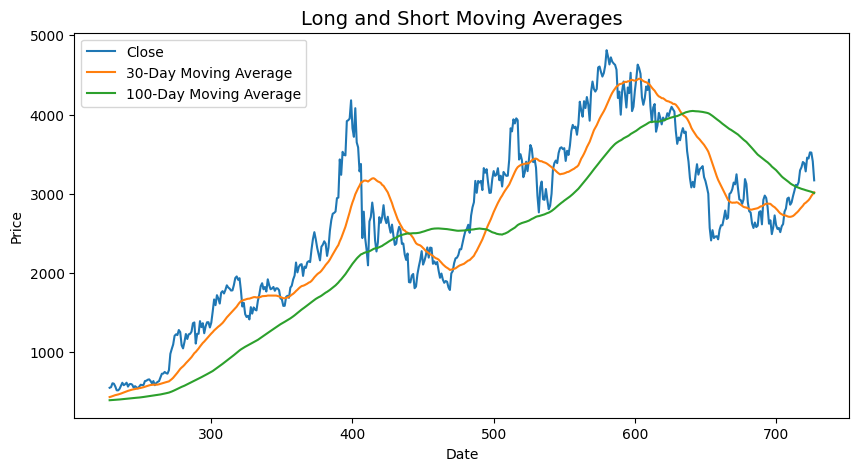

In [322]:
short_window = 30
long_window = 100

# Calculate moving averages
df['short_mavg'] = df['close'].rolling(short_window).mean()
df['long_mavg'] = df['close'].rolling(long_window).mean()

# Plot close price and moving averages
plot_data = df[-500:]
plt.figure(figsize=(10, 5))
plt.title('Long and Short Moving Averages', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(plot_data['close'], label='Close')
plt.plot(plot_data['short_mavg'], label='30-Day Moving Average')
plt.plot(plot_data['long_mavg'], label='100-Day Moving Average')
plt.legend()

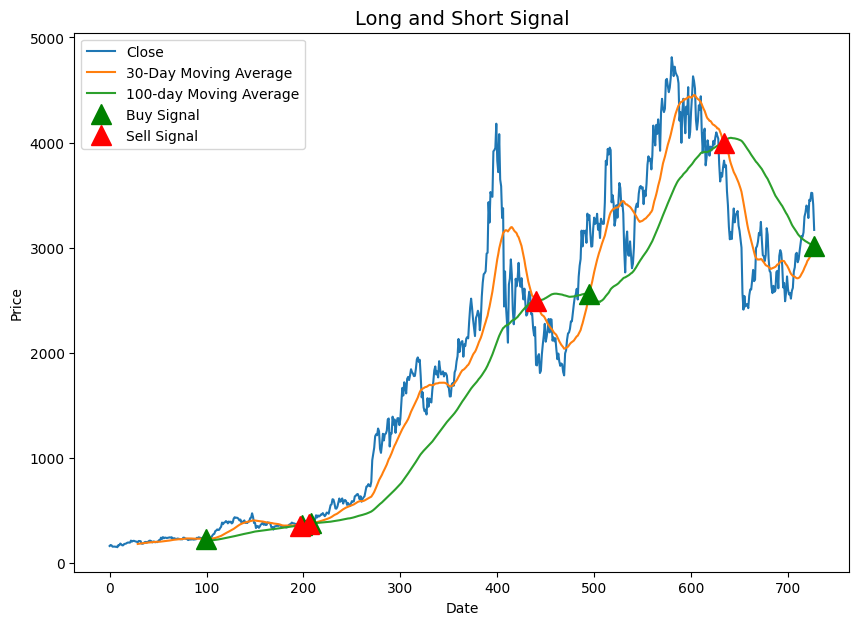

In [323]:
df['long_positions'] = np.where(df['short_mavg'] > df['long_mavg'], 1, 0)

# Take short positions
df['short_positions'] = np.where(df['short_mavg'] < df['long_mavg'], -1, 0)
df['positions'] = df['long_positions'] + df['short_positions']

# Plot close price and moving averages
plot_data = df[-3000:]
plt.figure(figsize=(10, 7))
plt.title('Long and Short Signal', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(plot_data['close'], label='Close')
plt.plot(plot_data['short_mavg'], label='30-Day Moving Average')
plt.plot(plot_data['long_mavg'], label='100-day Moving Average')
plt.plot(plot_data[(plot_data['long_positions'] == 1) &
(plot_data['long_positions'].shift(1) == 0)]['short_mavg'],
'^', ms=15, label='Buy Signal', color='green')
plt.plot(plot_data[(plot_data['short_positions'] == -1) &
(plot_data['short_positions'].shift(1) == 0)]['short_mavg'],
'^', ms=15, label='Sell Signal', color='red')
plt.legend()
plt.show()

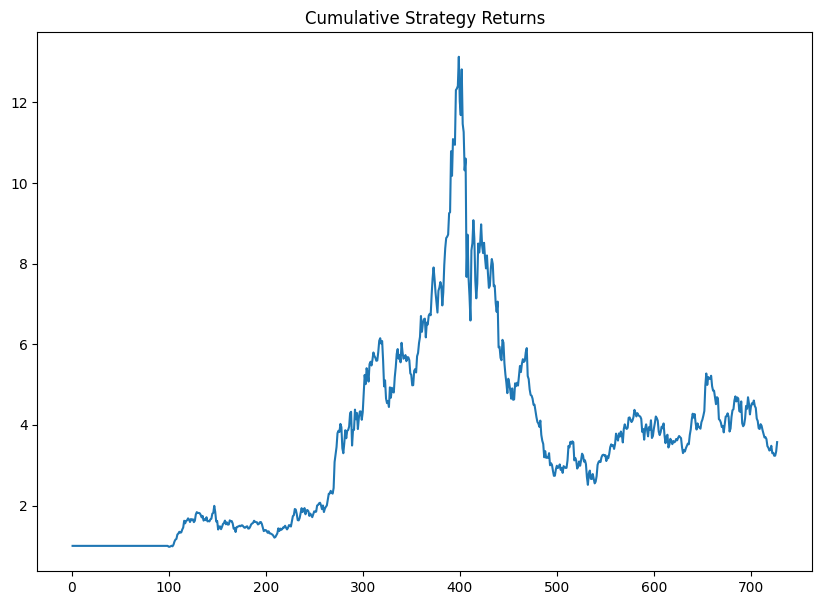

In [325]:
# Calculate daily returns
df['returns'] = df['close'].pct_change()

# Calculate strategy returns
df['strategy_returns'] = df['returns'] * df['positions'].shift(1)

# Plot cumulative returns
cumulative_returns = (df['strategy_returns'] + 1).cumprod()
cumulative_returns.plot(figsize=(10, 7))
plt.title('Cumulative Strategy Returns')
plt.show()

In [327]:
 #Total number of trading days
days = len(cumulative_returns)

# Calculate compounded annual growth rate
# We will use 252 instead of 365, as the number of trading days in a year is 252
annualised_returns = (cumulative_returns.iloc[-1]**(252/days)-1)*100

# Calculate annualised volatility
annualised_volatility = np.std(df.strategy_returns)*(252**0.5)*100

# Assume an average annual risk-free rate is 1%
risk_free_rate = 0.01/252
sharpe_ratio = np.sqrt(252)*(np.mean(df.strategy_returns) -
(risk_free_rate))/np.std(df.strategy_returns)

# Calculate the running maximum
running_max = np.maximum.accumulate(cumulative_returns.dropna())

# Ensure the value never drops below 1
running_max[running_max < 1] = 1

# Calculate the percentage drawdown
drawdown = (cumulative_returns)/running_max - 1
max_dd = drawdown.min()*100
print('The annualised returns of strategy is %.2f' % annualised_returns + '%')
print('The annualised_volatility is', annualised_volatility)
print('The risk free rate is', risk_free_rate)
print('The sharpe ratio is', sharpe_ratio)
print('The maximum drawdown is', max_dd)
calmar_ratio = annualised_returns / abs(max_dd)
print('The Calmar ratio is', calmar_ratio)
downside_returns = df.strategy_returns[df.strategy_returns < 0]
downside_volatility = np.std(downside_returns) * np.sqrt(252)
sortino_ratio = (np.mean(df.strategy_returns) - risk_free_rate) / downside_volatility
print('The Sortino ratio is', sortino_ratio)
average_gain = np.mean(df.strategy_returns[df.strategy_returns > 0])
average_loss = np.mean(df.strategy_returns[df.strategy_returns < 0])
print('The average gain is', average_gain)
print('The average loss is', average_loss)
winning_percentage = (len(df.strategy_returns[df.strategy_returns > 0]) / len(df.strategy_returns)) * 100
print('The winning percentage is %.2f%%' % winning_percentage)


The annualised returns of strategy is 55.40%
The annualised_volatility is 75.86102574377234
The risk free rate is 3.968253968253968e-05
The sharpe ratio is 0.949535221583122
The maximum drawdown is -80.85479613132867
The Calmar ratio is 0.6851833881825318
The Sortino ratio is 0.0052956748763983786
The average gain is 0.03887959063487453
The average loss is -0.03726186679779635
The winning percentage is 46.02%


In [330]:
bt.plot()

GridPlot(id='p1681', ...)

In [55]:
import pandas_ta as ta
df['EMA'] = ta.ema(df.ETHUSD_CLOSE, length=50)
df.tail()

,DATE,ETHUSD_VOLUME,ETHUSD_OPEN,ETHUSD_HIGHT,ETHUSD_CLOSE,ETHUSD_LOW,ETHUSD_TRANSACTIONS,EMA
723,2022-04-02 23:59:00,24.062936,3444.55,3445.95,3445.37,3442.555228,276,3004.029581
724,2022-04-03 23:59:00,47.206842,3521.02,3523.19,3522.79,3518.637406,269,3024.373127
725,2022-04-04 23:59:00,50.290972,3521.46,3523.00,3520.40,3519.200000,339,3043.825161
726,2022-04-05 23:58:00,412.878174,3409.68,3413.48,3409.23,3406.100000,762,3058.154763
727,2022-04-06 23:58:00,448.049227,3169.08,3172.60,3169.97,3166.390000,651,3062.539674


In [56]:
df=df[0:]
df.reset_index(drop=True, inplace=True)

In [57]:
df.rename(columns={
    'ETHUSD_OPEN': 'open',
    'ETHUSD_HIGHT': 'high',
    'ETHUSD_LOW': 'low',
    'ETHUSD_CLOSE': 'close',
    'ETHUSD_VOLUME': 'volume'
}, inplace=True)

In [76]:
EMAsignal = [0]*len(df)
backcandles = 3

for row in range(backcandles, len(df)):
    upt = 1
    dnt = 1
    for i in range(row-backcandles, row+1):
        if max(df.open[i], df.close[i])>=df.EMA[i]:
            dnt=0
        if min(df.open[i], df.close[i])<=df.EMA[i]:
            upt=0
    if upt==1 and dnt==1:
        EMAsignal[row]=3
    elif upt==1:
        EMAsignal[row]=2
    elif dnt==1:
        EMAsignal[row]=1

df['EMASignal'] = EMAsignal

In [77]:
df

,DATE,volume,open,high,close,low,ETHUSD_TRANSACTIONS,EMA,EMASignal,isPivot,pointpos,pattern_detected
0,2020-04-07 23:59:00,6050.274097,164.787,164.898021,164.64500,164.560000,47,NaN,0,0,NaN,0
1,2020-04-08 23:59:00,835.208537,173.300,173.780000,173.78000,173.096000,69,NaN,0,0,NaN,0
2,2020-04-09 23:59:00,1405.588180,169.825,170.070000,170.00000,169.697000,60,NaN,0,0,NaN,0
3,2020-04-10 23:59:00,588.018139,158.180,158.200000,158.16999,157.828000,30,NaN,3,0,NaN,0
4,2020-04-11 23:59:00,5.016882,158.650,158.790000,158.58000,158.410000,23,NaN,3,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
723,2022-04-02 23:59:00,24.062936,3444.550,3445.950000,3445.37000,3442.555228,276,3004.029581,2,0,NaN,0
724,2022-04-03 23:59:00,47.206842,3521.020,3523.190000,3522.79000,3518.637406,269,3024.373127,2,0,NaN,0
725,2022-04-04 23:59:00,50.290972,3521.460,3523.000000,3520.40000,3519.200000,339,3043.825161,2,0,NaN,0
726,2022-04-05 23:58:00,412.878174,3409.680,3413.480000,3409.23000,3406.100000,762,3058.154763,2,0,NaN,0


In [78]:
def isPivot(candle, window):
    """
    function that detects if a candle is a pivot/fractal point
    args: candle index, window before and after candle to test if pivot
    returns: 1 if pivot high, 2 if pivot low, 3 if both and 0 default
    """
    if candle-window < 0 or candle+window >= len(df):
        return 0
    
    pivotHigh = 1
    pivotLow = 2
    for i in range(candle-window, candle+window+1):
        if df.iloc[candle].low > df.iloc[i].low:
            pivotLow=0
        if df.iloc[candle].high < df.iloc[i].high:
            pivotHigh=0
    if (pivotHigh and pivotLow):
        return 3
    elif pivotHigh:
        return pivotHigh
    elif pivotLow:
        return pivotLow
    else:
        return 0

In [79]:
window=3
df['isPivot'] = df.apply(lambda x: isPivot(x.name,window), axis=1)

In [80]:
def pointpos(x):
    if x['isPivot']==2:
        return x['low']-1e-3
    elif x['isPivot']==1:
        return x['high']+1e-3
    else:
        return np.nan
df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

In [81]:
dfpl = df[300:1000]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'])])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="pivot")
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [82]:
def detect_structure(candle, backcandles, window):
    if (candle <= (backcandles+window)) or (candle+window+1 >= len(df)):
        return 0
    
    localdf = df.iloc[candle-backcandles-window:candle-window] #window must be greater than pivot window to avoid look ahead bias
    highs = localdf[localdf['isPivot'] == 1].high.tail(3).values
    lows = localdf[localdf['isPivot'] == 2].low.tail(3).values
    levelbreak = 0
    zone_width = 0.01
    if len(lows)==3:
        support_condition = True
        mean_low = lows.mean()
        for low in lows:
            if abs(low-mean_low)>zone_width:
                support_condition = False
                break
        if support_condition and (mean_low - df.loc[candle].close)>zone_width*2:
            levelbreak = 1

    if len(highs)==3:
        resistance_condition = True
        mean_high = highs.mean()
        for high in highs:
            if abs(high-mean_high)>zone_width:
                resistance_condition = False
                break
        if resistance_condition and (df.loc[candle].close-mean_high)>zone_width*2:
            levelbreak = 2
    return levelbreak


In [83]:
#df['pattern_detected'] = df.index.map(lambda x: detect_structure(x, backcandles=40, window=15))
df['pattern_detected'] = df.apply(lambda row: detect_structure(row.name, backcandles=5, window=5), axis=1)


In [84]:
df[df['pattern_detected']!=0].head(20)

,DATE,volume,open,high,close,low,ETHUSD_TRANSACTIONS,EMA,EMASignal,isPivot,pointpos,pattern_detected


In [85]:
data = df[:5000].copy()
def SIGNAL():
    return data.pattern_detected
data.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
}, inplace=True)
data

,DATE,Volume,Open,High,Close,Low,ETHUSD_TRANSACTIONS,EMA,EMASignal,isPivot,pointpos,pattern_detected
0,2020-04-07 23:59:00,6050.274097,164.787,164.898021,164.64500,164.560000,47,NaN,0,0,NaN,0
1,2020-04-08 23:59:00,835.208537,173.300,173.780000,173.78000,173.096000,69,NaN,0,0,NaN,0
2,2020-04-09 23:59:00,1405.588180,169.825,170.070000,170.00000,169.697000,60,NaN,0,0,NaN,0
3,2020-04-10 23:59:00,588.018139,158.180,158.200000,158.16999,157.828000,30,NaN,3,0,NaN,0
4,2020-04-11 23:59:00,5.016882,158.650,158.790000,158.58000,158.410000,23,NaN,3,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
723,2022-04-02 23:59:00,24.062936,3444.550,3445.950000,3445.37000,3442.555228,276,3004.029581,2,0,NaN,0
724,2022-04-03 23:59:00,47.206842,3521.020,3523.190000,3522.79000,3518.637406,269,3024.373127,2,1,3523.191,0
725,2022-04-04 23:59:00,50.290972,3521.460,3523.000000,3520.40000,3519.200000,339,3043.825161,2,0,NaN,0
726,2022-04-05 23:58:00,412.878174,3409.680,3413.480000,3409.23000,3406.100000,762,3058.154763,2,0,NaN,0


In [86]:
data['RSI'] = ta.rsi(data['Close'])
data.set_index("DATE", inplace=True)
data.index = pd.to_datetime(data.index, format='%d.%m.%Y %H:%M:%S.%f').floor('S')
data

,Volume,Open,High,Close,Low,ETHUSD_TRANSACTIONS,EMA,EMASignal,isPivot,pointpos,pattern_detected,RSI
DATE,,,,,,,,,,,,
2020-04-07 23:59:00,6050.274097,164.787,164.898021,164.64500,164.560000,47,NaN,0,0,NaN,0,NaN
2020-04-08 23:59:00,835.208537,173.300,173.780000,173.78000,173.096000,69,NaN,0,0,NaN,0,NaN
2020-04-09 23:59:00,1405.588180,169.825,170.070000,170.00000,169.697000,60,NaN,0,0,NaN,0,NaN
2020-04-10 23:59:00,588.018139,158.180,158.200000,158.16999,157.828000,30,NaN,3,0,NaN,0,NaN
2020-04-11 23:59:00,5.016882,158.650,158.790000,158.58000,158.410000,23,NaN,3,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-02 23:59:00,24.062936,3444.550,3445.950000,3445.37000,3442.555228,276,3004.029581,2,0,NaN,0,68.927321
2022-04-03 23:59:00,47.206842,3521.020,3523.190000,3522.79000,3518.637406,269,3024.373127,2,1,3523.191,0,71.186405
2022-04-04 23:59:00,50.290972,3521.460,3523.000000,3520.40000,3519.200000,339,3043.825161,2,0,NaN,0,71.014759


In [74]:
pip install backtesting


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 722.5 kB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 6.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.3/169.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 6.0 MB/s eta 0:00:00
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173916 sha256=ff417c8691455d9b7b50b8388c52b63eb9f88dafdef98569d960ab06897da32e
  Stored in directory: /Users/ekram/Library/Caches/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting
Note: you may need to restart the kernel to use updated packages.


In [88]:
from backtesting import Strategy
from backtesting import Backtest

class MyStrat(Strategy):
    mysize = 1000
    def init(self):
        super().init()
        self.signal = self.I(SIGNAL)

    def next(self):
        super().next()
        TPSLRatio = 2
        perc = 0.03
        
        #Close trades if RSI is above 70 for long positions and below 30 for short positions
        for trade in self.trades:
            if trade.is_long and self.data.RSI[-1] > 80:
                trade.close()
            elif trade.is_short and self.data.RSI[-1] < 20:
                trade.close()

        if self.signal!=0 and len(self.trades)==0 and self.data.pattern_detected==2:
            sl = self.data.Close[-1]-self.data.Close[-1]*perc
            sldiff = abs(sl-self.data.Close[-1])
            tp = self.data.Close[-1]+sldiff*TPSLRatio
            self.buy(sl=sl, tp=tp, size=self.mysize)
        
        elif self.signal!=0 and len(self.trades)==0 and self.data.pattern_detected==1:         
            sl = self.data.Close[-1]+self.data.Close[-1]*perc
            sldiff = abs(sl-self.data.Close[-1])
            tp = self.data.Close[-1]-sldiff*TPSLRatio
            self.sell(sl=sl, tp=tp, size=self.mysize)

bt = Backtest(data, MyStrat, cash=1000, margin=1/5)
stat = bt.run()
stat

Start                     2020-04-07 23:59:00
End                       2022-04-06 23:58:00
Duration                    728 days 23:59:00
Exposure Time [%]                         0.0
Equity Final [$]                       1000.0
Equity Peak [$]                        1000.0
Return [%]                                0.0
Buy & Hold Return [%]              1825.33633
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

In [63]:
pip install pandas_ta


174766.30s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=967d1764b9058cc158e58db48d727e90b1f9247c79a7844350f3180c6dcd25b4
  Stored in directory: /Users/ekram/Library/Caches/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta
Note: you may need to restart the kernel to use updated packages.


In [56]:
df= df_merged

Total Trades: 5
Winning Trades: 0
Losing Trades: 5
Winning Percentage: 0.00%
Average Daily Return: 0.0210%
Standard Deviation of Daily Return: 0.6655%
Sharpe Ratio: 0.5
Cumulative Strategy Return: 10.57%
Cumulative Market Return: 15.25%


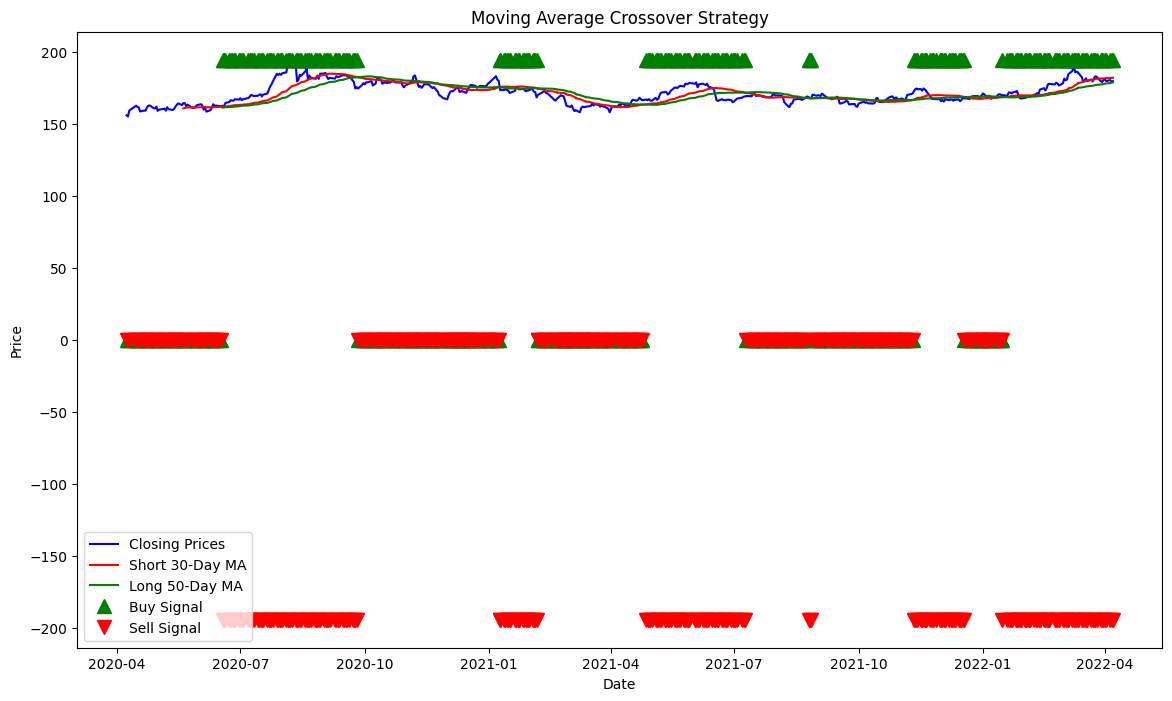

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and 'DATE' is already in datetime format
# You can adjust these parameters based on your dataset and analysis
price_column = 'GOLD_CLOSE'
short_window = 30
long_window = 50
initial_capital = 100000  # Starting capital for the strategy

# Calculate moving averages
df['Short_MA'] = df[price_column].rolling(window=short_window).mean()
df['Long_MA'] = df[price_column].rolling(window=long_window).mean()

# Generate trading signals based on moving average crossover
df['Signal'] = 0  # 0 represents no signal
df['Signal'][short_window:] = np.where(df['Short_MA'][short_window:] > df['Long_MA'][short_window:], 1, 0)

# Calculate daily returns
df['Daily_Returns'] = df[price_column].pct_change()

# Calculate strategy returns
df['Strategy_Returns'] = df['Signal'].shift(1) * df['Daily_Returns']

# Calculate cumulative returns
df['Cumulative_Strategy_Returns'] = (1 + df['Strategy_Returns']).cumprod()

# Calculate cumulative market returns (buy and hold strategy)
df['Cumulative_Market_Returns'] = (1 + df['Daily_Returns']).cumprod()

# Calculate key metrics
total_trades = df['Signal'].diff().abs().sum() / 2  # Number of buy/sell signals
winning_trades = (df['Signal'].diff().abs() == 2).sum() / 2  # Number of winning trades
losing_trades = (df['Signal'].diff().abs() == 1).sum() / 2  # Number of losing trades
winning_percentage = winning_trades / total_trades  # Percentage of winning trades
average_daily_return = df['Strategy_Returns'].mean()
std_dev_daily_return = df['Strategy_Returns'].std()
sharpe_ratio = (average_daily_return / std_dev_daily_return) * np.sqrt(252)  # Assuming 252 trading days in a year
cumulative_strategy_return = df['Cumulative_Strategy_Returns'][-1] - 1
cumulative_market_return = df['Cumulative_Market_Returns'][-1] - 1

# Print key metrics
print("Total Trades:", int(total_trades))
print("Winning Trades:", int(winning_trades))
print("Losing Trades:", int(losing_trades))
print("Winning Percentage:", '{:.2%}'.format(winning_percentage))
print("Average Daily Return:", '{:.4%}'.format(average_daily_return))
print("Standard Deviation of Daily Return:", '{:.4%}'.format(std_dev_daily_return))
print("Sharpe Ratio:", round(sharpe_ratio, 2))
print("Cumulative Strategy Return:", '{:.2%}'.format(cumulative_strategy_return))
print("Cumulative Market Return:", '{:.2%}'.format(cumulative_market_return))

# Plot results
plt.figure(figsize=(14, 8))
plt.plot(df['DATE'], df[price_column], label='Closing Prices', color='blue')
plt.plot(df['DATE'], df['Short_MA'], label=f'Short {short_window}-Day MA', color='red')
plt.plot(df['DATE'], df['Long_MA'], label=f'Long {long_window}-Day MA', color='green')
plt.plot(df['DATE'], df['Signal'] * df[price_column].max(), '^', markersize=10, color='g', label='Buy Signal')
plt.plot(df['DATE'], -df['Signal'] * df[price_column].max(), 'v', markersize=10, color='r', label='Sell Signal')
plt.title('Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Best Short Window: 30
Best Long Window: 50
Best Sharpe Ratio: 0.5


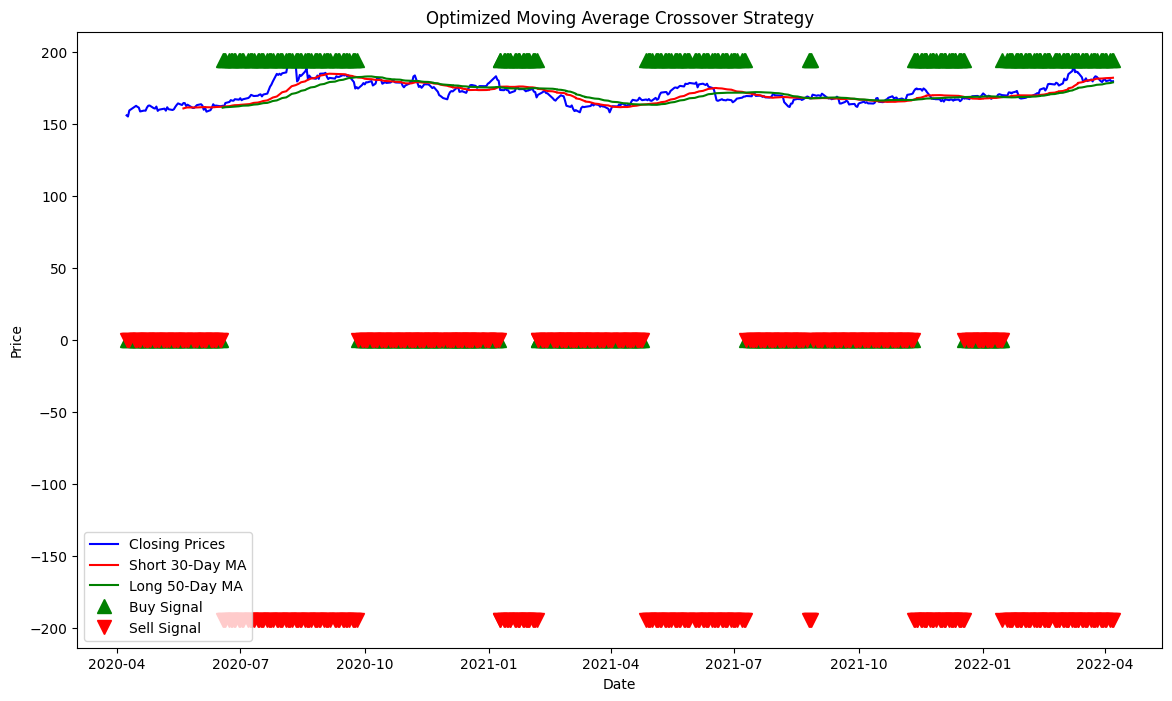

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and 'DATE' is already in datetime format
# You can adjust these parameters based on your dataset and analysis
price_column = 'GOLD_CLOSE'
initial_capital = 100000  # Starting capital for the strategy

# Define a range of short and long moving average window values to test
short_window_values = [5, 10, 20, 30]
long_window_values = [50, 100, 150, 200]

# Initialize variables to store the best parameters and metrics
best_short_window = None
best_long_window = None
best_sharpe_ratio = float('-inf')

# Iterate through combinations of short and long windows
for short_window in short_window_values:
    for long_window in long_window_values:
        # Skip combinations where short window >= long window
        if short_window >= long_window:
            continue

        # Calculate moving averages
        df['Short_MA'] = df[price_column].rolling(window=short_window).mean()
        df['Long_MA'] = df[price_column].rolling(window=long_window).mean()

        # Generate trading signals based on moving average crossover
        df['Signal'] = 0  # 0 represents no signal
        df['Signal'][short_window:] = np.where(df['Short_MA'][short_window:] > df['Long_MA'][short_window:], 1, 0)

        # Calculate daily returns
        df['Daily_Returns'] = df[price_column].pct_change()

        # Calculate strategy returns
        df['Strategy_Returns'] = df['Signal'].shift(1) * df['Daily_Returns']

        # Calculate key metrics
        sharpe_ratio = (df['Strategy_Returns'].mean() / df['Strategy_Returns'].std()) * np.sqrt(252)

        # Update best parameters if the current combination has a higher Sharpe ratio
        if sharpe_ratio > best_sharpe_ratio:
            best_sharpe_ratio = sharpe_ratio
            best_short_window = short_window
            best_long_window = long_window

# Print the best parameters and metrics
print("Best Short Window:", best_short_window)
print("Best Long Window:", best_long_window)
print("Best Sharpe Ratio:", round(best_sharpe_ratio, 2))

# Plot the results using the best parameters
df['Short_MA'] = df[price_column].rolling(window=best_short_window).mean()
df['Long_MA'] = df[price_column].rolling(window=best_long_window).mean()
df['Signal'] = np.where(df['Short_MA'] > df['Long_MA'], 1, 0)
df['Strategy_Returns'] = df['Signal'].shift(1) * df['Daily_Returns']

# Plot results
plt.figure(figsize=(14, 8))
plt.plot(df['DATE'], df[price_column], label='Closing Prices', color='blue')
plt.plot(df['DATE'], df['Short_MA'], label=f'Short {best_short_window}-Day MA', color='red')
plt.plot(df['DATE'], df['Long_MA'], label=f'Long {best_long_window}-Day MA', color='green')
plt.plot(df['DATE'], df['Signal'] * df[price_column].max(), '^', markersize=10, color='g', label='Buy Signal')
plt.plot(df['DATE'], -df['Signal'] * df[price_column].max(), 'v', markersize=10, color='r', label='Sell Signal')
plt.title('Optimized Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


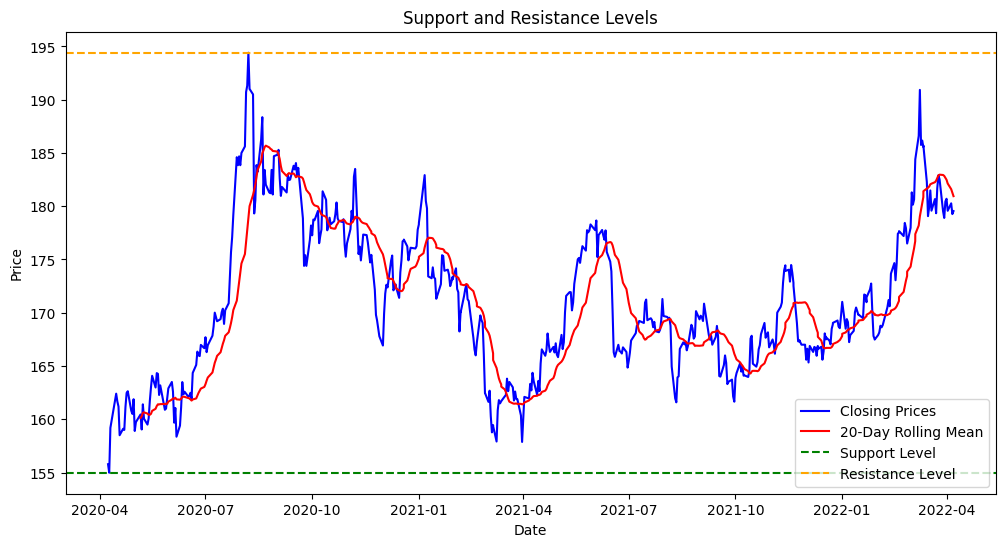

In [55]:
price_column = 'GOLD_CLOSE'
rolling_window = 20

# Calculate rolling mean for smoother price data
df_merged['RollingMean'] = df_merged[price_column].rolling(window=rolling_window).mean()

# Plot the closing prices and rolling mean for visual analysis
plt.figure(figsize=(12, 6))
plt.plot(df_merged['DATE'], df_merged[price_column], label='Closing Prices', color='blue')
plt.plot(df_merged['DATE'], df_merged['RollingMean'], label=f'{rolling_window}-Day Rolling Mean', color='red')

# Identify support and resistance levels based on historical data
support_level = df_merged[price_column].min()
resistance_level = df_merged[price_column].max()

# Plot support and resistance levels
plt.axhline(y=support_level, linestyle='--', color='green', label='Support Level')
plt.axhline(y=resistance_level, linestyle='--', color='orange', label='Resistance Level')

# Customize the plot
plt.title('Support and Resistance Levels')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [50]:
def support(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.low[i]>df1.low[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.low[i]<df1.low[i-1]):
            return 0
    return 1

def resistance(df1, l, n1, n2): #n1 n2 before and after candle l
    for i in range(l-n1+1, l+1):
        if(df1.high[i]<df1.high[i-1]):
            return 0
    for i in range(l+1,l+n2+1):
        if(df1.high[i]>df1.high[i-1]):
            return 0
    return 1

In [52]:
length = len(df_merged)
high = list(df_merged['GOLD_HIGHT'])
low = list(df_merged['GOLD_LOW'])
close = list(df_merged['GOLD_CLOSE'])
open = list(df_merged['GOLD_OPEN'])
bodydiff = [0] * length

highdiff = [0] * length
lowdiff = [0] * length
ratio1 = [0] * length
ratio2 = [0] * length

def isEngulfing(l):
    row=l
    bodydiff[row] = abs(open[row]-close[row])
    if bodydiff[row]<0.000001:
        bodydiff[row]=0.000001      

    bodydiffmin = 0.002
    if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        open[row-1]<close[row-1] and
        open[row]>close[row] and 
        (open[row]-close[row-1])>=-0e-5 and close[row]<open[row-1]): #+0e-5 -5e-5
        return 1

    elif(bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
        open[row-1]>close[row-1] and
        open[row]<close[row] and 
        (open[row]-close[row-1])<=+0e-5 and close[row]>open[row-1]):#-0e-5 +5e-5
        return 2
    else:
        return 0
       
def isStar(l):
    bodydiffmin = 0.0020
    row=l
    highdiff[row] = high[row]-max(open[row],close[row])
    lowdiff[row] = min(open[row],close[row])-low[row]
    bodydiff[row] = abs(open[row]-close[row])
    if bodydiff[row]<0.000001:
        bodydiff[row]=0.000001
    ratio1[row] = highdiff[row]/bodydiff[row]
    ratio2[row] = lowdiff[row]/bodydiff[row]

    if (ratio1[row]>1 and lowdiff[row]<0.2*highdiff[row] and bodydiff[row]>bodydiffmin):# and open[row]>close[row]):
        return 1
    elif (ratio2[row]>1 and highdiff[row]<0.2*lowdiff[row] and bodydiff[row]>bodydiffmin):# and open[row]<close[row]):
        return 2
    else:
        return 0
    
def closeResistance(l,levels,lim):
    if len(levels)==0:
        return 0
    c1 = abs(df.high[l]-min(levels, key=lambda x:abs(x-df.high[l])))<=lim
    c2 = abs(max(df.open[l],df.close[l])-min(levels, key=lambda x:abs(x-df.high[l])))<=lim
    c3 = min(df.open[l],df.close[l])<min(levels, key=lambda x:abs(x-df.high[l]))
    c4 = df.low[l]<min(levels, key=lambda x:abs(x-df.high[l]))
    if( (c1 or c2) and c3 and c4 ):
        return 1
    else:
        return 0
    
def closeSupport(l,levels,lim):
    if len(levels)==0:
        return 0
    c1 = abs(df.low[l]-min(levels, key=lambda x:abs(x-df.low[l])))<=lim
    c2 = abs(min(df.open[l],df.close[l])-min(levels, key=lambda x:abs(x-df.low[l])))<=lim
    c3 = max(df.open[l],df.close[l])>min(levels, key=lambda x:abs(x-df.low[l]))
    c4 = df.high[l]>min(levels, key=lambda x:abs(x-df.low[l]))
    if( (c1 or c2) and c3 and c4 ):
        return 1
    else:
        return 0

In [53]:
n1=2
n2=2
backCandles=30
signal = [0] * length

for row in range(backCandles, len(df)-n2):
    ss = []
    rr = []
    for subrow in range(row-backCandles+n1, row+1):
        if support(df, subrow, n1, n2):
            ss.append(df.low[subrow])
        if resistance(df, subrow, n1, n2):
            rr.append(df.high[subrow])
    #!!!! parameters
    if ((isEngulfing(row)==1 or isStar(row)==1) and closeResistance(row, rr, 150e-5) ):#and df.RSI[row]<30
        signal[row] = 1
    elif((isEngulfing(row)==2 or isStar(row)==2) and closeSupport(row, ss, 150e-5)):#and df.RSI[row]>70
        signal[row] = 2
    else:
        signal[row] = 0



AttributeError: 'DataFrame' object has no attribute 'low'

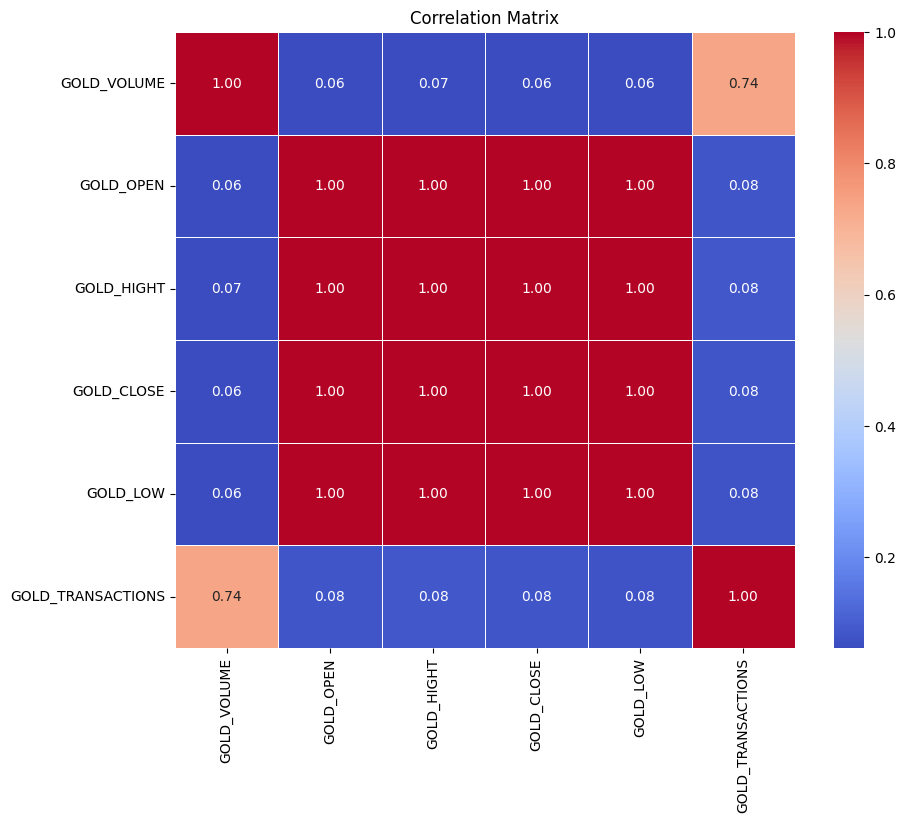

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = gold_asset.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Convert the 'DATE' column to datetime format
gold_asset['DATE'] = pd.to_datetime(gold_asset['DATE'])

# # Sort the DataFrame by date and time in descending order
# df = df.sort_values(by=['DATE'], ascending=True)

# # Group by date and select the last row for each date
# df = df.groupby(df['DATE'].dt.date).last()

# # Reset the index to make the 'DATE' column a regular column again
# df = df.reset_index()

# # Display the resulting DataFrame
# print(df)

KeyError: 'DATE'

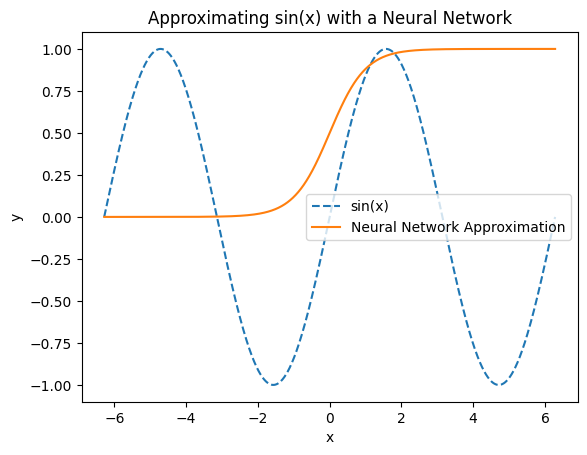

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
f = lambda x: np.sin(x)
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Generate x values
x_values = np.linspace(-2*np.pi, 2*np.pi, 1000)

# Plot the functions
plt.plot(x_values, f(x_values), label='sin(x)', linestyle='--')
plt.plot(x_values, sigmoid(2*x_values), label='Neural Network Approximation')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approximating sin(x) with a Neural Network')
plt.show()


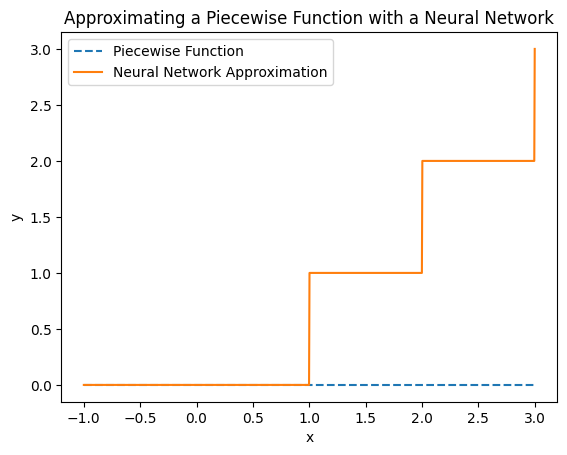

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Define the piecewise function
def piecewise_function(x):
    if x < 0:
        return 0
    elif 0 <= x < 1:
        return x
    elif 1 <= x <= 2:
        return 2 - x
    else:
        return 0

# Define the neural network approximation
def neural_network_approximation(x):
    return max(0, 1 * max(0, x) + 0 * max(0, x) + 0 * max(0, x))

# Generate x values
x_values = np.linspace(-1, 3, 1000)

# Calculate y values for both functions
piecewise_values = np.vectorize(piecewise_function)(x_values)
nn_values = np.vectorize(neural_network_approximation)(x_values)

# Plot the functions
plt.plot(x_values, piecewise_values, label='Piecewise Function', linestyle='--')
plt.plot(x_values, nn_values, label='Neural Network Approximation')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approximating a Piecewise Function with a Neural Network')
plt.show()


In [94]:
import numpy as np

def softmax(logits):
    exp_logits = np.exp(logits)
    softmax_probs = exp_logits / np.sum(exp_logits)
    return softmax_probs

# Example logits
logits = np.array([3.0, 7.0, 0.1])

# Applying softmax
softmax_output = softmax(logits)

print("Logits:", logits)
print("Softmax Output:", softmax_output)
print("Sum of Probabilities:", np.sum(softmax_output))


Logits: [3.  7.  0.1]
Softmax Output: [0.01796843 0.98104289 0.00098868]
Sum of Probabilities: 1.0


Another Approach


In [2]:
import sys
sys.path.append('../')
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from src.finance_ml.data_preparation.data_preparation import DataLoader
from src.finance_ml.data_preparation.asset_class import Asset
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import finta
import datetime
from pandas.plotting import scatter_matrix
import yfinance as yf
from pathlib import Path
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import log_loss, zero_one_loss, matthews_corrcoef, roc_curve, auc, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


In [2]:
pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 13.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 13.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 13.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.8/162.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━

In [3]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.2 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 8.9 MB/s eta 0:00:00
  Created wheel for lxml: filename=lxml-4.9.3-cp310-cp310-macosx_11_0_arm64.whl size=1492336 sha256=79b4c4f9a1bced5df9063862355cdd9b7099f23d483119871bac0d7f0257333f
  Stored in directory: /Users/ekram/Library/Caches/pip/wheels/38/0b/56/fd5ffdd76481c9220a131ff39258963d8384599f0109b688d0
  Created wheel for peewee:

In [1]:
pip install dataframe_helper

ERROR: Could not find a version that satisfies the requirement dataframe_helper (from versions: none)
ERROR: No matching distribution found for dataframe_helper
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install finta

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install dataframe-helpers

Note: you may need to restart the kernel to use updated packages.


In [4]:
dataloader = DataLoader(time_index_col= 'DATE', keep_cols = ['VOLUME','OPEN', "HIGHT",'CLOSE', 'LOW', 'TRANSACTIONS'])
assets = {'ETHUSD':'../data/cryptos/ETHUSD_2020-04-07_2022-04-06.parquet'}
df = dataloader.load_dataset(assets)
df

,ETHUSD_VOLUME,ETHUSD_OPEN,ETHUSD_HIGHT,ETHUSD_CLOSE,ETHUSD_LOW,ETHUSD_TRANSACTIONS
DATE,,,,,,
2020-04-07 17:58:00,6509.138870,172.270,172.290000,172.220000,171.953,34
2020-04-07 17:59:00,2030.296178,172.280,172.400000,172.310000,171.928,39
2020-04-07 18:00:00,1379.195752,171.974,172.440000,172.224027,171.974,64
2020-04-07 18:01:00,1070.755580,172.041,172.270000,172.260000,171.930,66
2020-04-07 18:02:00,323.613345,172.250,172.250000,171.980000,171.840,31
...,...,...,...,...,...,...
2022-04-06 23:54:00,256.869062,3166.900,3168.300000,3164.100000,3163.340,661
2022-04-06 23:55:00,1315.909782,3164.100,3176.485925,3169.950000,3162.730,1020
2022-04-06 23:56:00,272.323250,3170.050,3174.442301,3162.330000,3162.200,775


In [4]:
daily_close = df[['ETHUSD_CLOSE']].reset_index().pivot('DATE', 'ETHUSD_CLOSE')

# Calculate the daily percentage change for `daily_close`
daily_pct_change = daily_close.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

: 

In [23]:

signals_df = df.copy()

# Use the pct_change function to generate returns from close prices
signals_df["Actual Returns"] = signals_df["ETHUSD_CLOSE"].pct_change()

# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head(100))
display(signals_df.tail())

,DATE,ETHUSD_VOLUME,ETHUSD_OPEN,ETHUSD_HIGHT,ETHUSD_CLOSE,ETHUSD_LOW,ETHUSD_TRANSACTIONS,Actual Returns
1,2020-04-08 23:59:00,835.208537,173.300000,173.780000,173.780000,173.096,69,0.055483
2,2020-04-09 23:59:00,1405.588180,169.825000,170.070000,170.000000,169.697,60,-0.021752
3,2020-04-10 23:59:00,588.018139,158.180000,158.200000,158.169990,157.828,30,-0.069588
4,2020-04-11 23:59:00,5.016882,158.650000,158.790000,158.580000,158.410,23,0.002592
5,2020-04-12 23:59:00,274.374058,158.860000,159.039359,159.039359,158.379,117,0.002897
...,...,...,...,...,...,...,...,...
96,2020-07-12 23:59:00,1192.523958,243.207168,243.370000,242.616000,242.327,96,0.014408
97,2020-07-13 23:59:00,129.055892,239.470000,239.900000,239.900000,239.420,20,-0.011195
98,2020-07-14 23:59:00,116.330013,240.360000,240.450000,240.396000,240.335,22,0.002068
99,2020-07-15 23:59:00,72.466134,238.310000,238.559000,238.547000,238.240,26,-0.007691


,DATE,ETHUSD_VOLUME,ETHUSD_OPEN,ETHUSD_HIGHT,ETHUSD_CLOSE,ETHUSD_LOW,ETHUSD_TRANSACTIONS,Actual Returns
723,2022-04-02 23:59:00,24.062936,3444.55,3445.95,3445.37,3442.555228,276,-0.003211
724,2022-04-03 23:59:00,47.206842,3521.02,3523.19,3522.79,3518.637406,269,0.022471
725,2022-04-04 23:59:00,50.290972,3521.46,3523.00,3520.40,3519.200000,339,-0.000678
726,2022-04-05 23:58:00,412.878174,3409.68,3413.48,3409.23,3406.100000,762,-0.031579
727,2022-04-06 23:58:00,448.049227,3169.08,3172.60,3169.97,3166.390000,651,-0.070180


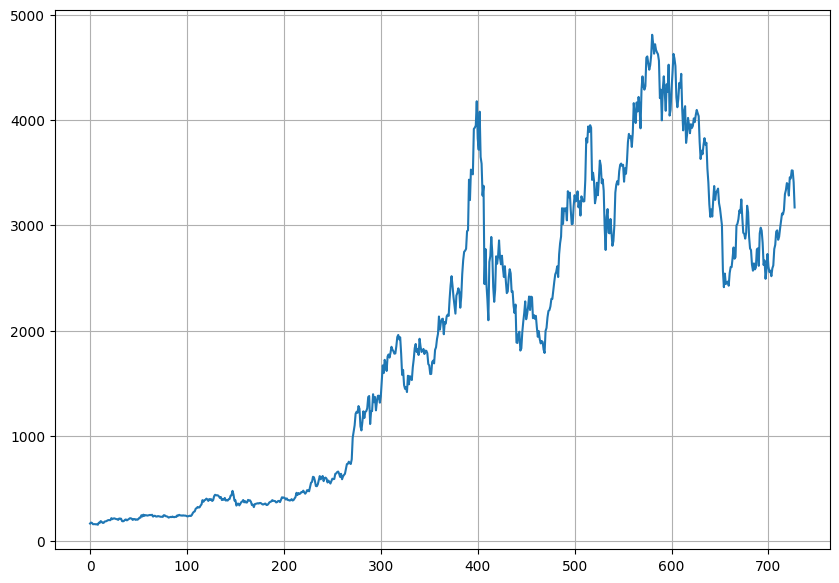

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

# Call the plot method
df['ETHUSD_CLOSE'].plot(figsize=(10, 7), grid=True)
plt.show()

In [40]:
df= df_merged

In [41]:
df['overnight_returns'] = (
    df['ETHUSD_OPEN']-df['ETHUSD_CLOSE'].shift(1))/df['ETHUSD_CLOSE'].shift(1)

# Open to Close
df['intraday_returns'] = (df['ETHUSD_CLOSE']-df['ETHUSD_OPEN'])/df['ETHUSD_OPEN']

df.head(3)

,DATE,ETHUSD_VOLUME,ETHUSD_OPEN,ETHUSD_HIGHT,ETHUSD_CLOSE,ETHUSD_LOW,ETHUSD_TRANSACTIONS,overnight_returns,intraday_returns
DATE,,,,,,,,,
2020-04-07,2020-04-07 23:59:00,6050.274097,164.787,164.898021,164.645,164.560,47,NaN,-0.000862
2020-04-08,2020-04-08 23:59:00,835.208537,173.300,173.780000,173.780,173.096,69,0.052568,0.002770
2020-04-09,2020-04-09 23:59:00,1405.588180,169.825,170.070000,170.000,169.697,60,-0.022759,0.001030


In [42]:
# Define your conditions on which you want to trade
cond_1 = df.overnight_returns < -0.01
cond_2 = df.overnight_returns > -0.02

# Store it in the signal columns of dataframe data
df['signal'] = np.where(cond_1 & cond_2, 1, 0)

df.head()

,DATE,ETHUSD_VOLUME,ETHUSD_OPEN,ETHUSD_HIGHT,ETHUSD_CLOSE,ETHUSD_LOW,ETHUSD_TRANSACTIONS,overnight_returns,intraday_returns,signal
DATE,,,,,,,,,,
2020-04-07,2020-04-07 23:59:00,6050.274097,164.787,164.898021,164.64500,164.560,47,NaN,-0.000862,0
2020-04-08,2020-04-08 23:59:00,835.208537,173.300,173.780000,173.78000,173.096,69,0.052568,0.002770,0
2020-04-09,2020-04-09 23:59:00,1405.588180,169.825,170.070000,170.00000,169.697,60,-0.022759,0.001030,0
2020-04-10,2020-04-10 23:59:00,588.018139,158.180,158.200000,158.16999,157.828,30,-0.069529,-0.000063,0
2020-04-11,2020-04-11 23:59:00,5.016882,158.650,158.790000,158.58000,158.410,23,0.003035,-0.000441,0


In [43]:
df.loc[df.signal==1].head()

,DATE,ETHUSD_VOLUME,ETHUSD_OPEN,ETHUSD_HIGHT,ETHUSD_CLOSE,ETHUSD_LOW,ETHUSD_TRANSACTIONS,overnight_returns,intraday_returns,signal
DATE,,,,,,,,,,
2020-04-13,2020-04-13 23:59:00,1300.447894,156.940,156.94,156.760,156.359,28,-0.013200,-0.001147,1
2020-04-17,2020-04-17 23:59:00,659.702549,170.574,171.27,170.890,170.452,36,-0.011165,0.001853,1
2020-05-03,2020-05-03 23:59:00,579.418344,210.012,210.30,210.240,209.740,40,-0.017878,0.001086,1
2020-05-04,2020-05-04 23:59:00,319.347744,206.880,207.02,206.860,206.608,53,-0.015982,-0.000097,1
2020-05-26,2020-05-26 23:59:00,90.829101,201.230,201.23,200.909,200.860,33,-0.014187,-0.001595,1


In [44]:
strategy_returns = df.signal * df.intraday_returns

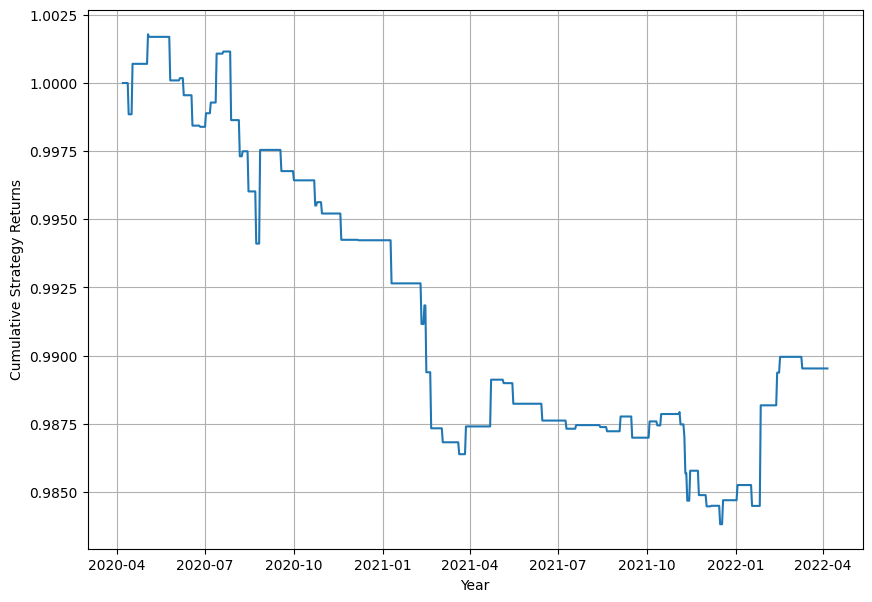

In [45]:
(strategy_returns+1).cumprod().plot(figsize=(10, 7), grid=True)
plt.xlabel('Year')
plt.ylabel('Cumulative Strategy Returns')
plt.show()

In [12]:
pip install pyfolio

Note: you may need to restart the kernel to use updated packages.


Start date,2020-04-07
End date,2022-04-06
Total months,34
,Backtest
Annual return,-0.4%
Cumulative returns,-1.0%
Annual volatility,0.6%
Sharpe ratio,-0.65
Calmar ratio,-0.20
Stability,0.77
Max drawdown,-1.8%


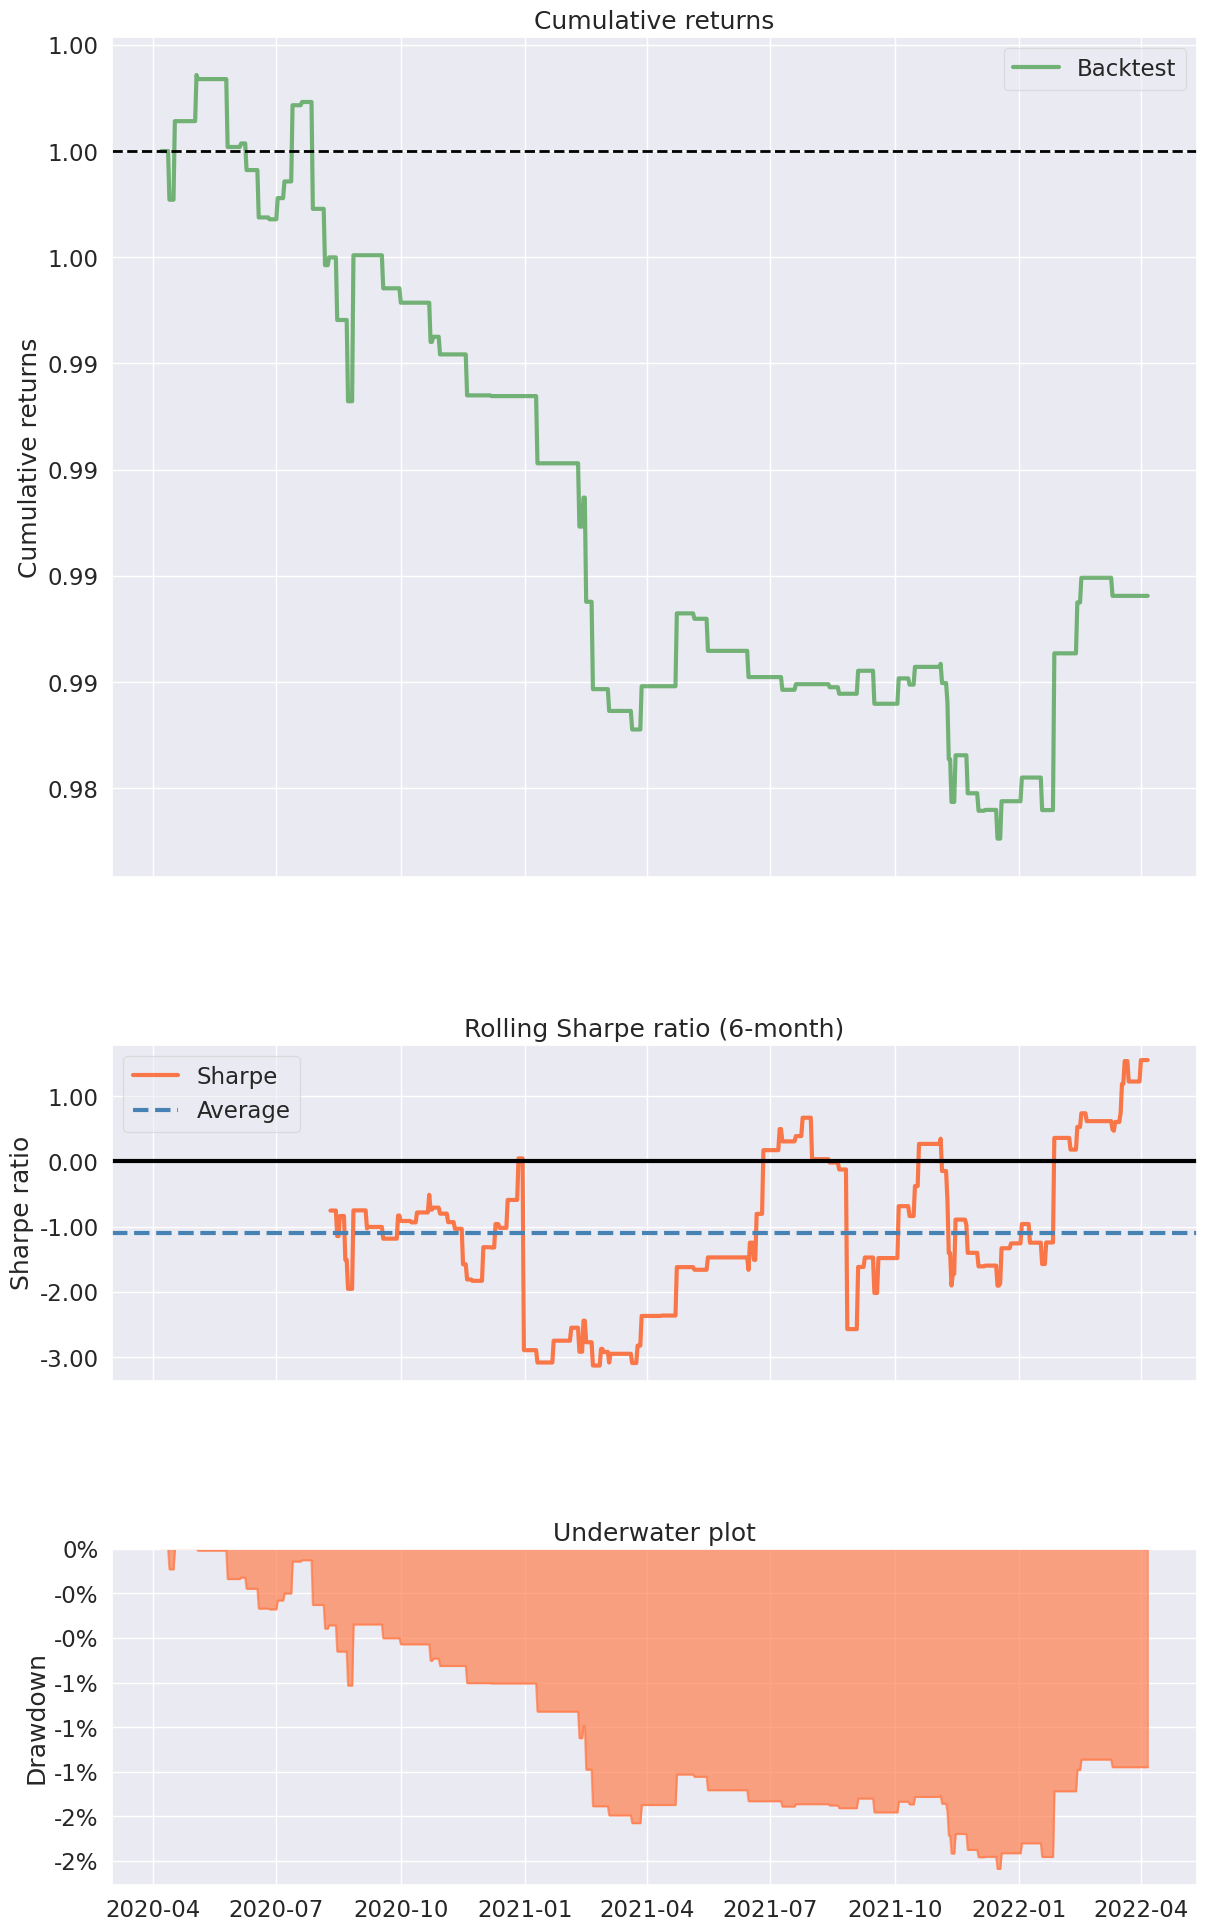

In [46]:
# Detailed performance analysis
import pyfolio as pf
pf.create_simple_tear_sheet(strategy_returns)

In [31]:
returns_df = pd.DataFrame(strategy_returns, columns=['strategy_returns'])

# Assuming the index of strategy_returns is a datetime index
returns_df.index = pd.to_datetime(returns_df.index)

# Use pyfolio to create a simple tear sheet
pf.create_simple_tear_sheet(returns_df['strategy_returns'])

AttributeError: 'Series' object has no attribute 'iteritems'

In [14]:
df['strategy_returns'] = df['signal'].shift(1) * df['intraday_returns']

# Drop NaN values
df = df.dropna()

# Create a simple tear sheet using pyfolio
pf.create_simple_tear_sheet(df['strategy_returns'])

AttributeError: 'Series' object has no attribute 'iteritems'

In [17]:
pip install pandas==1.5.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 13.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.3
    Uninstalling pandas-2.1.3:
      Successfully uninstalled pandas-2.1.3
Note: you may need to restart the kernel to use updated packages.
